In [1]:
import pandas as pd
from collections import Counter

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

In [2]:
dataset =load_breast_cancer(as_frame=True)
data = dataset['data']
data['target'] = dataset['target']
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

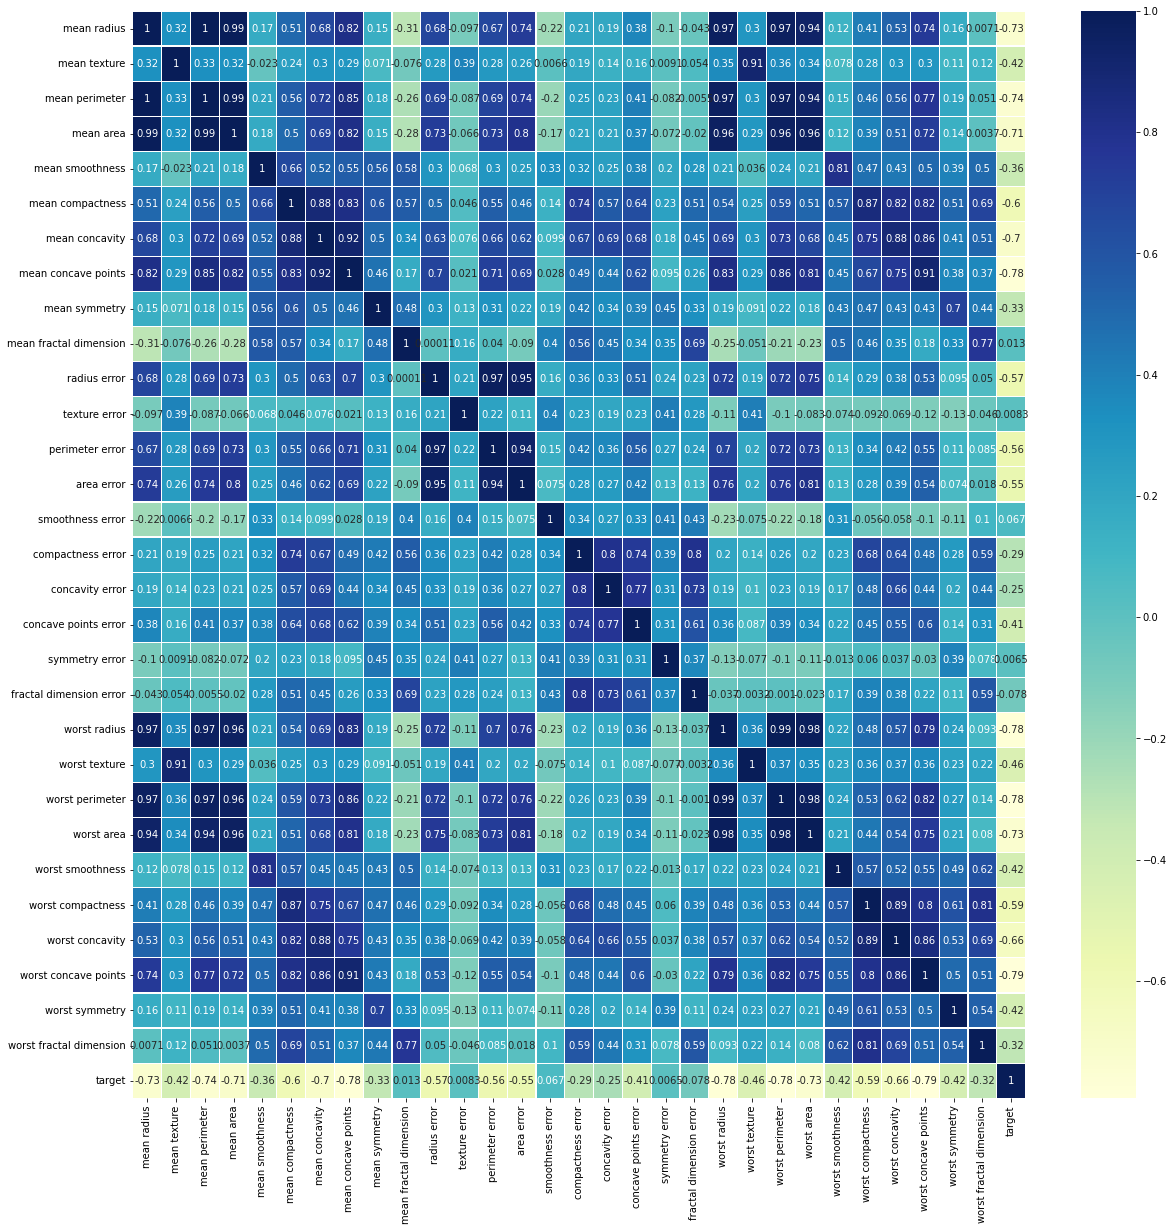

In [4]:
corrmat = data.corr()  
#print(corrmat)
_, ax = plt.subplots(figsize =(20, 20))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True,)

<AxesSubplot:>

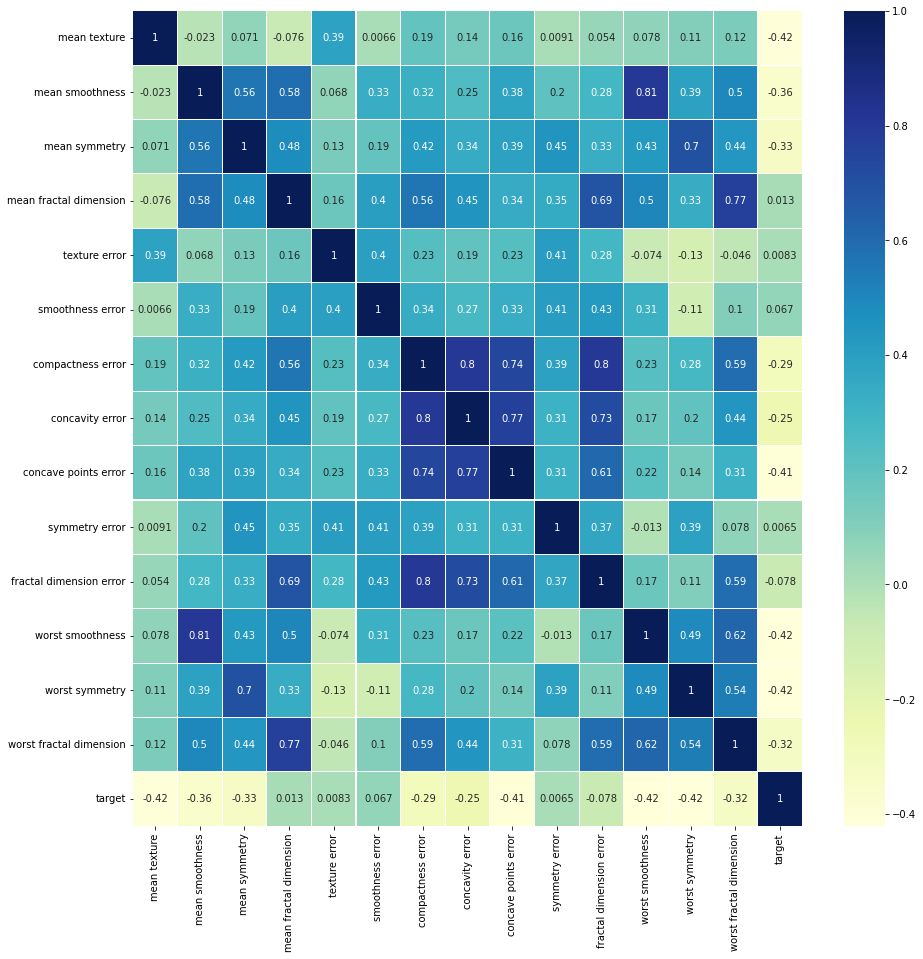

In [5]:
to_drop = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
           'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points',
           'area error', 'perimeter error', 'radius error', 'worst compactness', 'mean compactness',
           'worst texture']
data = data.drop(columns=to_drop)
corrmat = data.corr()  
#print(corrmat)
_, ax = plt.subplots(figsize =(15, 15))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True,)

In [6]:
data

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension,target
0,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.4601,0.11890,0
1,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2750,0.08902,0
2,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.3613,0.08758,0
3,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6638,0.17300,0
4,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.1726,0.05623,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.2060,0.07115,0
565,28.25,0.09780,0.1752,0.05533,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.2572,0.06637,0
566,28.08,0.08455,0.1590,0.05648,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.2218,0.07820,0
567,29.33,0.11780,0.2397,0.07016,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.4087,0.12400,0


In [7]:
data = shuffle(data)
data
#Counter(data.stroke.values)

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension,target
84,15.65,0.09723,0.2079,0.05968,1.2550,0.005969,0.018120,0.02007,0.007027,0.01972,0.002607,0.1377,0.3379,0.07924,1
166,9.71,0.09594,0.1381,0.06400,0.4064,0.007809,0.009816,0.01099,0.005344,0.01254,0.002120,0.1436,0.2090,0.07699,1
44,21.81,0.09714,0.1746,0.06177,0.6123,0.003350,0.013840,0.01452,0.006853,0.01113,0.001720,0.1503,0.3693,0.09618,0
315,16.85,0.08511,0.1215,0.05673,0.7151,0.004928,0.003012,0.00262,0.003390,0.01393,0.001344,0.1104,0.1917,0.06174,1
180,21.87,0.10940,0.1800,0.05770,1.4810,0.004631,0.025370,0.03109,0.012410,0.01575,0.002747,0.1472,0.2856,0.08082,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,24.99,0.08837,0.1872,0.06341,1.0790,0.007138,0.046530,0.03829,0.011620,0.02068,0.006111,0.1340,0.3187,0.10230,1
481,19.24,0.07991,0.1579,0.05594,0.9264,0.003704,0.010820,0.01530,0.006275,0.01062,0.002217,0.1064,0.2356,0.07603,1
304,18.16,0.08853,0.1411,0.06243,1.0590,0.006652,0.026520,0.02221,0.007807,0.01894,0.003411,0.1144,0.2208,0.07638,1
392,19.97,0.11600,0.1929,0.06744,1.3310,0.007269,0.029280,0.04972,0.016390,0.01852,0.004232,0.1681,0.3187,0.10190,0


In [8]:
X, y = data.drop(columns='target'), data['target']
kfold = KFold(4, shuffle=True,random_state=42)

for i, (train, test) in enumerate(kfold.split(data)):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

    forest = RandomForestClassifier(
        n_estimators=350,
        max_features = 4,
        max_depth=5,
        n_jobs=4,
        bootstrap=True,
        #class_weight='balanced'
    )
    tree = DecisionTreeClassifier(
        #class_weight='balanced',
        max_depth=5
    )
    
    
    tree.fit(X_train, y_train)
    forest.fit(X_train, y_train)

    y_predicted_forest = forest.predict(X_test)
    y_predicted_tree = tree.predict(X_test)
    
    
    print(f'\n================= Fold {i+1} =====================')
    print('\t'*3,'Tree', u"\U0001F333")
    print(classification_report(y_test, y_predicted_tree),'\n')
    print('\t'*2,'Forest', u"\U0001F333"*6)
    print(classification_report(y_test, y_predicted_forest),'\n')
    #print(forest.oob_score_)
    
    logreg = LogisticRegression(
        class_weight='balanced'
    )
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    logreg.fit(X_train_norm, y_train)
    y_predicted_logreg = logreg.predict(X_test_norm)
    
    print('\t'*2,'Logistic regression',)
    print(classification_report(y_test, y_predicted_logreg),'\n')



================= Fold 1 =====================
			 Tree 🌳
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        56
           1       0.85      0.85      0.85        87

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143
 

		 Forest 🌳🌳🌳🌳🌳🌳
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        56
           1       0.89      0.94      0.92        87

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143
 

		 Logistic regression
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        56
           1       0.91      0.84      0.87        87

    accuracy                           0.85       143
   macro avg       0.85  

In [9]:
from sklearn.

SyntaxError: invalid syntax (<ipython-input-9-f8934e568edb>, line 1)